This task involves working on a computer vision problem, such as image classification or object detection.

170498071/170498071 [==============================] - 3s 0us/step


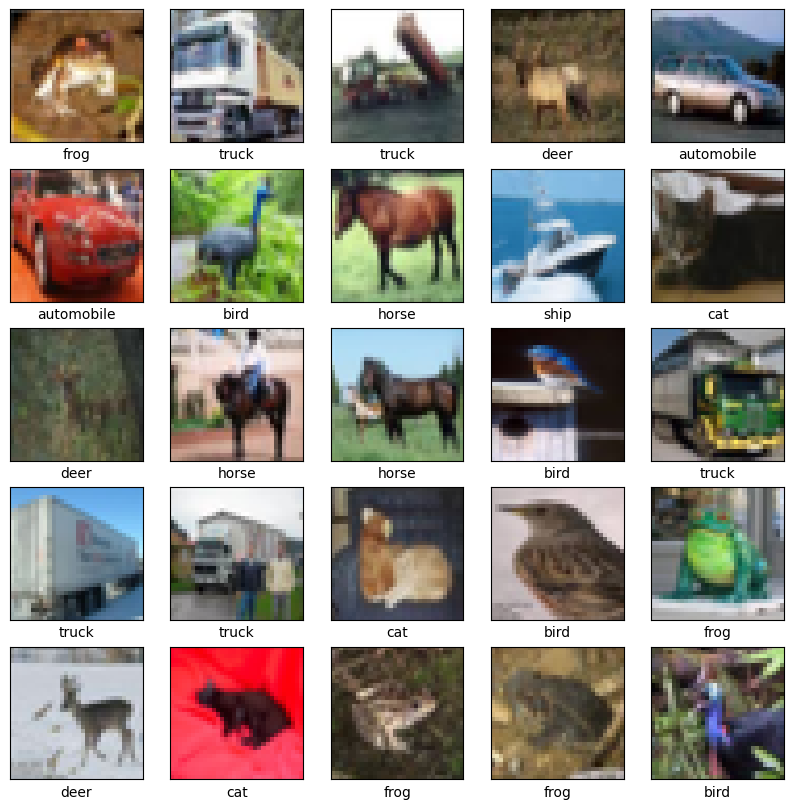

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5094 - accuracy: 0.4505 - val_loss: 1.2699 - val_accuracy: 0.5516
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1477 - accuracy: 0.5924 - val_loss: 1.0567 - val_accuracy: 0.6218
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0054 - accuracy: 0.6463 - val_loss: 0.9902 - val_accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9143 - accuracy: 0.6767 - val_loss: 0.9422 - val_accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8369 - accuracy: 0.7061 - val_loss: 0.9499 - val_accuracy: 0.6716
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7874 - accuracy: 0.7246 - val_loss: 0.8860 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7341 - accuracy: 0.7428 - val_loss: 0.8817 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step


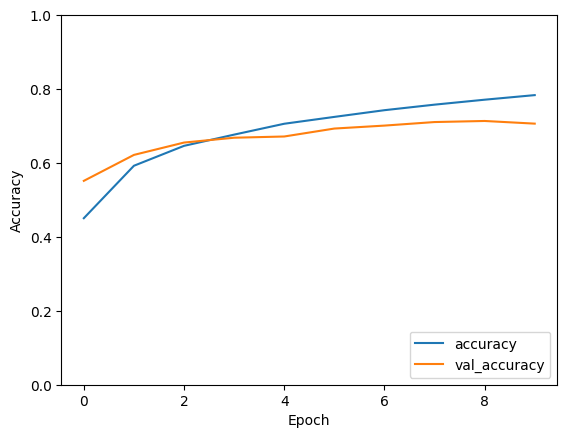

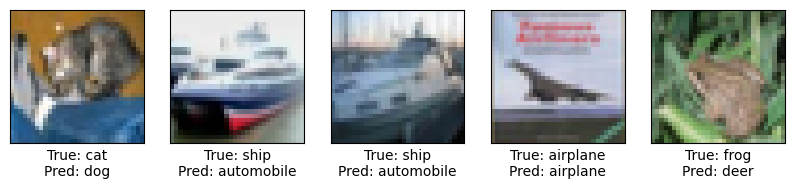

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the first 25 images from the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save('cifar10_model.h5')

# Load the model
new_model = tf.keras.models.load_model('cifar10_model.h5')

# Verify the model's predictions
predictions = new_model.predict(test_images)

# Display the first 5 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f"True: {class_names[test_labels[i][0]]}\nPred: {class_names[tf.argmax(predictions[i])]}")
plt.show()
